# Calculando integrais com métodos numéricos

#### Problema:
A velocidade do paraquedista é dada pela seguinte função do tempo:
$$
v(t)=\dfrac{gm}{c}(1-e^{-\left(c/m\right)t})
$$
em que $v$ é a velocidade $(m/s)$, $g = 9,8 m/s^{2}$ é a constante gravitacional, $m = 68,1 kg$ é a massa do paraquedista e $c = 12,5 kg/s$ é o coeficiente de arrasto.

Suponha que quiséssemos saber quanto o paraquedista caiu depois de um certo intervalo de tempo $t$.


$$ 
\begin{equation}
    d=\int_{0}^{t} \dfrac{gm}{c}(1-e^{-\left(c/m\right)t})
\end{equation}
$$

In [1]:
import sympy as sy
import numpy as np
import pandas as pd
import timeit as tm
import matplotlib.pyplot as plt
sy.init_printing(pretty_print=True)

In [4]:
from sympy.abc import g,m,c,t
f=((g*m)/c)*(1-sy.exp((-c/m)*t))
f

In [5]:
f=f.subs([(g,9.8),(m,68.1),(c,12.5)])
f

In [6]:
v=sy.lambdify(t,f,'numpy')

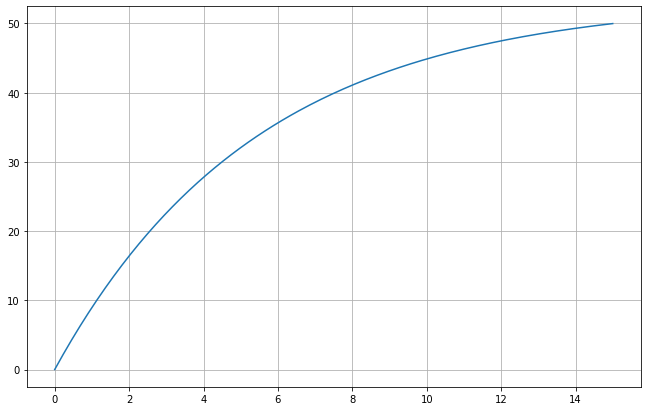

In [5]:
t=np.linspace(0,15,200)
fig=plt.figure(figsize=(11,7))
plt.grid()
_=plt.plot(t,v(t))

In [6]:
t=sy.Symbol('t')
anl=float(sy.integrate(f,(t,0,10)))
anl

#### Regra do Trapézio Simples

$$
\begin{equation}
    \int_{a}^{b} f(x)dx \approx \dfrac{h}{2}(f(a)+f(b))
\end{equation}
$$

In [7]:
def trapezio_simples(a,b,f):
    h = b-a
    return (h/2)*(f(a)+f(b))

In [8]:
inicio = tm.default_timer()
sol_t_s=trapezio_simples(0,10,v)
fim =  tm.default_timer()
tabela={'Solução':[sol_t_s],'Tempo':[fim-inicio],
        'Erro':[abs(anl-sol_t_s)]}
pd.DataFrame(tabela)

,Solução,Tempo,Erro
0,224.365688,0.000229,65.069459


#### Regra de Simpson Simples


$$
\begin{equation}
    \int_{a}^{b} f(x)dx \approx \dfrac{h}{3}(f(a)+4f\left(\dfrac{a+b}{2}\right)+f(b))
\end{equation}
$$

In [9]:
def simpson_simples(a,b,f):
    h = (b-a)/2
    return(h/3)*(f(a)+(4*(f((a+b)/2)))+f(b))

In [10]:
inicio = tm.default_timer()
sol_s_s=simpson_simples(0,10,v)
fim =  tm.default_timer()
tabela={'Solução':[sol_s_s],'Tempo':[fim-inicio],
        'Erro':[abs(anl-sol_s_s)]}
pd.DataFrame(tabela)

,Solução,Tempo,Erro
0,288.560331,0.00012,0.874816


In [15]:
u=np.linspace(0,1,11)
u[1:]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

#### Regra de Trapézio Composto

$$
\begin{equation}
    \int_{a}^{b} f(x)dx \approx \dfrac{h}{2}(y_0+2y_1+...+2y_{n-1}+y_n)
\end{equation}
$$

In [14]:
def trapezio_composto(a,b,n,f):
    h = (b-a)/n
    x=np.linspace(start=a,stop=b,num=n+1)
    fx=np.zeros((n+1))
    fx[0]=h*(f(x[0])+f(x[n]))/2
    fx[1:n]=h*(f(x[1:n]))
    print(fx)
    return np.sum(fx)

In [8]:
x=np.linspace(0,10,11);x


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [15]:
trapezio_composto(0,10,10,v)


[22.43656879  8.95318221 16.4049808  22.60716691 27.76929146 32.06576523
 35.64175156 38.61807097 41.09528323 43.15708499  0.        ]


In [17]:
n=[10,20,50,200,500,1000,2000,5000,10000]
sol_t_c,tempo_t,erro_t=[],[],[]
for i in n:
    inicio = tm.default_timer()
    sol_t_c.append(trapezio_composto(0,10,i,v))
    fim =  tm.default_timer()
    tempo_t.append((fim-inicio))
    erro_t.append(abs(anl-sol_t_c[len(sol_t_c)-1]))

#### Regra de Simpson Composta

$$
\begin{equation}
    \dfrac{h}{3}(y_0+4y_1+2y_2...+2y_{n-2}+4y_{n-1}+y_n)
\end{equation}
$$

In [18]:
def simpson_composto(a,b,n,f):
    h=(b-a)/n
    x=np.linspace(a,b,n+1)
    fx=np.zeros(n+1)
    fx[0]=f(x[0])
    fx[1::2]=4*f(x[1::2])
    fx[2::2]=2*f(x[2::2])
    fx[n]=f(x[n])
    return (h/3)*np.sum(fx)

In [19]:
sol_s_c,tempo_s,erro_s=[],[],[]
for i in n:
    inicio = tm.default_timer()
    sol_s_c.append(simpson_composto(0,10,i,v))
    fim =  tm.default_timer()
    tempo_s.append((fim-inicio))
    erro_s.append(abs(anl-sol_s_c[len(sol_s_c)-1]))

In [20]:
tabela={'n':n,'Solução Trapézio':sol_t_c,'Tempo 1':tempo_t,
        'Erro 1':erro_t,'Solução Simpson':sol_s_c,
        'Tempo 2':tempo_s,'Erro 2':erro_s}
pd.DataFrame(tabela)

,n,Solução Trapézio,Tempo 1,Erro 1,Solução Simpson,Tempo 2,Erro 2
0,10,288.749146,0.000344,6.860004e-01,289.433611,0.000383,1.535548e-03
1,20,289.263574,0.000129,1.715723e-01,289.435050,0.000179,9.626033e-05
2,50,289.407692,0.000112,2.745480e-02,289.435144,0.000207,2.466340e-06
3,200,289.433431,0.000107,1.715961e-03,289.435147,0.000795,9.635585e-09
4,500,289.434872,0.000153,2.745541e-04,289.435147,0.000301,2.465868e-10
5,1000,289.435078,0.000691,6.863854e-05,289.435147,0.000190,1.540457e-11
6,2000,289.435129,0.000323,1.715964e-05,289.435147,0.000184,9.663381e-13
7,5000,289.435144,0.000731,2.745542e-06,289.435147,0.000251,5.684342e-14
8,10000,289.435146,0.000803,6.863855e-07,289.435147,0.000470,5.684342e-14


#### Referências:
 - [Métodos Numéricos para Engenharia 7.ed.](https://www.amazon.com.br/M%C3%A9todos-Num%C3%A9ricos-Engenharia-Steven-Chapra-ebook/dp/B01FWPMPPA)